# Classification with Python


To be completed soon ...


Let's take a deeper look at how we can use Python to classify data. 
Python provides a lot of tools for implementing Classification. 
In this tutorial We'll use the `scikit-learn` library which is the most popular open-source Python data science library, to build a simple classifier.

Let’s learn how to use `scikit-learn` to perform Classification in simple terms.



As mentioned there are many classification algorithms available. We will use the following algorithms for this tutorial:

- Decision Trees (C4.5/ID3, CART)
- Naive Bayes
- AdaBoost

```{Note}

An end-to-end Scikit-Learn workflow:

Here’s the mile-high overview of each step:
    
1. Get the data ready (split into features and labels, prepare train and test steps)
2. Choose a model for our problem
3. Fit the model to the data and use it to make a prediction
4. Evaluate the model
5. Experiment to improve
6. Save a model for someone else to use

```

## Decision Tree Classifier Building in python


### Step 1. Get the data ready

As an example dataset, we'll import `heart-disease.csv`. (You can find the dataset here: https://github.com/kb22/Heart-Disease-Prediction/tree/master)

This file contains anonymized patient medical records that focus on whether or not a section of patients has heart disease or not, and then we can use it to look for patterns.

(Side note: this is a classification problem since we're trying to predict whether something is one thing or another. Do they have it or not?).


In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

In [4]:
import pandas as pd
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Here, each row is a different patient and all columns except `target` are different patient characteristics.

The `target` column indicates whether the patient has heart disease (`target=1`) or not (`target=0`).

This is our "label" column and is the variable we're going to try and predict. The rest of the columns (often called features) are what we'll be using to predict the `target` value.

```{note}
It's a common custom to save features to a variable `X` and labels to a variable `y`. In practice, we'd like to use the `X` (features) to build a predictive algorithm to predict the `y` (labels).
```

In [5]:
# Create X (all the feature columns)
X = heart_disease.drop("target", axis=1)

# Create y (the target column)
y = heart_disease["target"]

# Check the head of the features DataFrame
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [9]:
# Check the head and the value counts of the labels 
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

One of the most important practices in Machine Learning is to split datasets into training and test sets.

This way, a model will **train on the training** set to learn patterns, and then those patterns can be **evaluated on the test set**.

It’s important that a model never sees testing data during training. This is equivalent to a student studying course materials during the semester (training set) and then testing their abilities on the following exam (testing set).

Scikit-learn provides the `sklearn.model_selection.train_test_split` method to split datasets in training and test sets.

```{note}
A common practice to use an 80/20 or 70/30 or 75/25 split for training/testing data. There is also a third set, known as a validation set (e.g. 70/15/15 for training/validation/test) for hyperparameter tuning, but for now we'll focus on training and test sets.
 ```

In [10]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.25) # by default train_test_split uses 25% of the data for the test set

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

### Step 2. Choose the model and hyperparameters

Scikit-Learn refers to models as "estimators", however, they are also referred to as either a `model` or `clf` (short for classifier).

A model's hyperparameters are settings you can change to adjust it for your problem, much like knobs on an oven you can tune to cook your favorite dish.

Since we're working on a classification problem, we'll start with a `DecisionTreeClassifier`.

In [11]:
# import the DecisionTreeClassifier model class from the tree module
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model (using the default parameters)
model = DecisionTreeClassifier()


We can see the current hyperparameters of a model with the `get_params()` method.

In [12]:
# get parameters of this model
model.get_params()


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

```{note}
A brief explanation of the parameters:
- criterion: the function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. (If we set the criterion to "entropy", the model will use the information gain to measure the quality of a split. and that actually means that the decision tree will be id3/ c4.5. If we set the criterion to "gini", the model will use the gini impurity to measure the quality of a split. and that actually means that the decision tree will be CART.)
- splitter: the strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.
- max_depth: the maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- min_samples_split: the minimum number of samples required to split an internal node.
- min_samples_leaf: the minimum number of samples required to be at a leaf node.
- min_weight_fraction_leaf: the minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.
- max_features: the number of features to consider when looking for the best split.
- random_state: the seed used by the random number generator.
- max_leaf_nodes: grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
- min_impurity_decrease: a node will be split if this split induces a decrease of the impurity greater than or equal to this value.
- min_impurity_split: threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
```

### Step 3. Fit the model to the data and use it to make a prediction

Fitting a model to a dataset involves passing the data and asking it to figure out the patterns.

Such as:

- If there are labels (supervised learning), then the model tries to work out the relationship between the data and the labels
- Or, if there are no labels (unsupervised learning), the model tries to find patterns and group similar samples together
- Most Scikit-Learn models have the `fit(X,y)` method built-in, where the `X` parameter is the features and the `y` parameter is the labels.

In our case, we start by fitting a model on the training split (`X_train, y_train`).

In [13]:
# Fit the model to the training data
model.fit(X_train, y_train)


DecisionTreeClassifier()

**Now we can use the model to make a prediction.**

The whole point of training a machine learning model is to use it to make some kind of prediction in the future.

Once your model instance is trained, you can use the `predict()` method to predict a target value given a set of features. In other words, use the model, along with some new, unseen, and unlabelled data to predict the label.

```{note}
Data you predict on should be in the same shape and format as data you trained on.
```

For example:

The following data doesn't work, because it has incorrect shapes:

In [15]:
y_label = model.predict(np.array([0, 2, 3, 4]))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Well, since our model was trained on data from `X_train`, our predictions should be made on data in the same format and shape as `X_train`.

And so in order to predict a label, data has to be in the same shape as `X_train`. As we can see, our test data `X_test` has actually the same shape as train data.

In [16]:
X_test.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3
113,43,1,0,110,211,0,1,161,0,0.0,2,0,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3
61,54,1,1,108,309,0,1,156,0,0.0,2,0,3
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2


Thus, we can use the model to make a prediction on the test data (further evaluation)

In [17]:
y_preds = model.predict(X=X_test)


### Step 4. Evaluate the model


Now that we've made some predictions, we can start to use some more Scikit-Learn methods to figure out how good our model is.

Each model or estimator has a built-in `score()` method. This method compares how well the model was able to learn the patterns between the features and labels.

The `score()` method for each model uses a standard evaluation metric to measure your model's results.

In the case of a classifier (our model), one of the most common evaluation metrics is `accuracy` (i.e. the fraction of correct predictions out of total predictions).

Let's check out our model's accuracy on the training set.

In [18]:
# Evaluate the model on the training set
train_acc = model.score(X=X_train, y=y_train)
print(f"The model's accuracy on the training dataset is: {train_acc*100}%")

The model's accuracy on the training dataset is: 100.0%


Our model does pretty well on the training dataset, mainly because it has a chance to see both data and labels, so how about the test dataset?

In [20]:
# Evaluate the model on the test set
test_acc = model.score(X=X_test, y=y_test)
print(f"The model's accuracy on the testing dataset is: {test_acc*100:.2f}%")

The model's accuracy on the testing dataset is: 81.58%


Looks like our model's accuracy is a bit less on the test dataset than on the training dataset. This is quite often the case because remember, a model has never seen the testing examples before.

As we mentioned in previous tutorial, there are also other metrics that we can use to evaluate our classification model. 


All of the following classification metrics come from the `sklearn.metrics` module:

- `confusion_matrix(y_true, y_pred)` - Create a confusion matrix to compare predictions to truth labels
- `accuracy_score(y_true, y_pred)` - Find the accuracy score (the default metric) for a classifier
- `precision_score(y_true, y_pred)` - Calculate the precision of a classification model
- `recall_score(y_true, y_pred)` - Calculate the recall of a classification model
- `f1_score(y_true, y_pred)` - Calculate the F1 score of a classification model
- `roc_curve()` - Receiver Operating Characteristic (ROC) curve, which can be used to help visualize the tradeoff between sensitivity and specificity

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_preds)

# Calculate precision
precision = precision_score(y_test, y_preds)

# Calculate recall
recall = recall_score(y_test, y_preds)

# Calculate F1 score
f1 = f1_score(y_test, y_preds)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_preds)

# calculate confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# print the metrics
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Confusion Matrix: \n{conf_mat}")


Accuracy: 81.58%
Precision: 0.92
Recall: 0.75
F1 Score: 0.83
ROC AUC: 0.83
Confusion Matrix: 
[[29  3]
 [11 33]]


### Step 5. Experiment to improve


As we saw, usually the first model we build is not the best model. We need to tune the hyperparameters of the model to get the best model.
For example, in the DecisionTreeClassifier model, the more important parameters that we can tune are:


- **criterion** : optional (default=”gini”) or Choose attribute selection measure. This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

- **splitter** : string, optional (default=”best”) or Split Strategy. This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

- **max_depth** : int or None, optional (default=None) or Maximum Depth of a Tree. The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).


We can play with these hyperparameters to get the best model.
One of the simple ways that we can use to tune the hyperparameters is to use a for loop to try different values of the hyperparameters and see which one gives the best model.


In [26]:
# Try different values of max_depth
for max_depth in [1, 2, 3, 5, 7, 10, 15, 25]:
    # Create a function to evaluate a model
    model = DecisionTreeClassifier(max_depth=max_depth, 
                                    min_samples_split=2, 
                                    min_samples_leaf=1, 
                                    max_features=None, 
                                    random_state=42)

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Predict the labels of the test set
    y_preds = model.predict(X_test)

    # Evaluate the model
    print(f"Evaluating the model with max_depth={max_depth}: ")
    print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
    print("\n")
    


Evaluating the model with max_depth=1: 
Accuracy: 76.32%


Evaluating the model with max_depth=2: 
Accuracy: 76.32%


Evaluating the model with max_depth=3: 
Accuracy: 78.95%


Evaluating the model with max_depth=5: 
Accuracy: 82.89%


Evaluating the model with max_depth=7: 
Accuracy: 77.63%


Evaluating the model with max_depth=10: 
Accuracy: 76.32%


Evaluating the model with max_depth=15: 
Accuracy: 76.32%


Evaluating the model with max_depth=25: 
Accuracy: 76.32%




From the results, it seems that a max_depth of 3 or 5 is the best for the model. 
We can continue to play around with the other hyperparameters to see if we can improve the model's performance.




### Visualizing Decision Trees


One of the most powerful aspects of decision trees is that they're able to make decisions in a way that's interpretable by humans. 
That is, you can visualize what decisions the model is making.
You can visualize the decision tree using the plot_tree function from the tree module of scikit-learn.


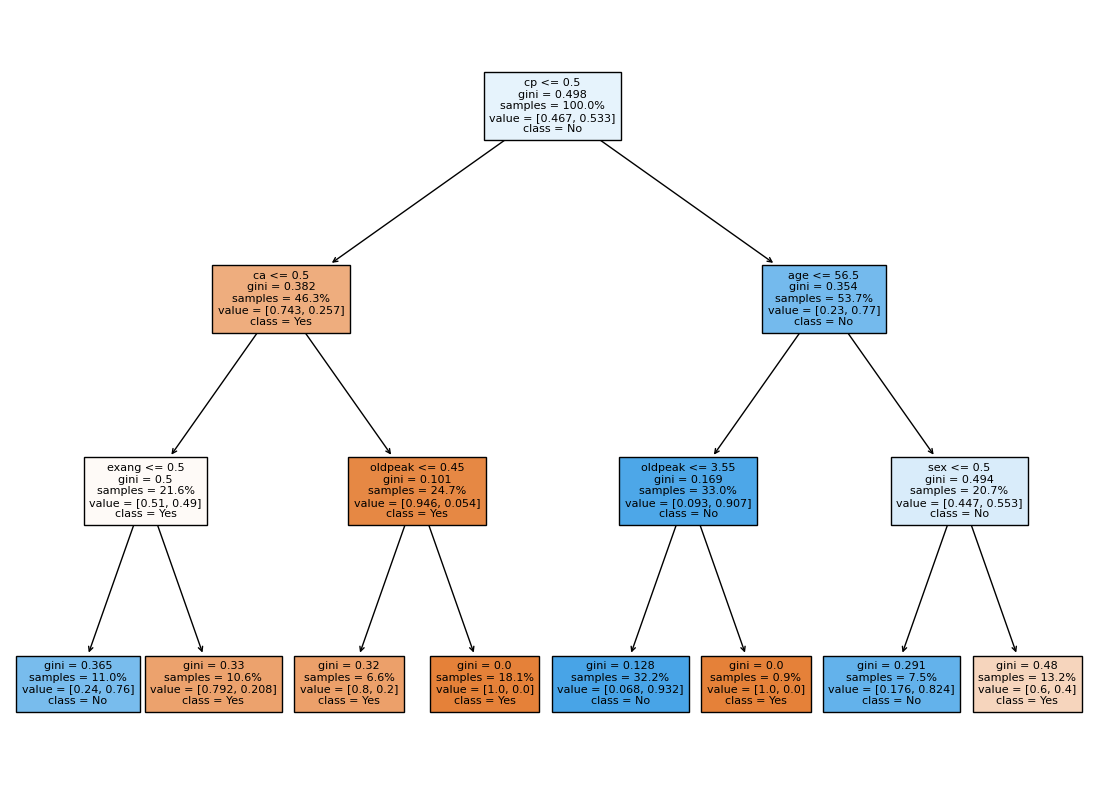

In [36]:
# visualize the decision tree
from sklearn.tree import plot_tree

# build the model with max_depth=3
model = DecisionTreeClassifier(max_depth=3, 
                                    min_samples_split=2, 
                                    min_samples_leaf=1, 
                                    max_features=None, 
                                    random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)
    
plt.figure(figsize=(14, 10))
# clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(model, 
          filled=True, # fill the nodes with colors of majority class
          feature_names=X.columns, # define the feature names
          max_depth=3, # limit the depth of the tree for better visualization
          fontsize=8, # font size for the text in the tree
          proportion=True, # show proportions instead of counts
          class_names=["Yes", "No"] # define the class names
          )
plt.show()